Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
cyl_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_cyl.csv?raw=true', compression=None)
hook_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_hook.csv?raw=true', compression=None)
lat_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_lat.csv?raw=true', compression=None)
palm_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_palm.csv?raw=true', compression=None)
spher_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_spher.csv?raw=true', compression=None)
tip_00 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_tip.csv?raw=true', compression=None)

In [ ]:
cyl_01 = cyl_00.drop(cyl_00.columns[0], axis=1)
hook_01 = hook_00.drop(hook_00.columns[0], axis=1)
lat_01 = lat_00.drop(lat_00.columns[0], axis=1)
palm_01 = palm_00.drop(palm_00.columns[0], axis=1)
spher_01 = spher_00.drop(spher_00.columns[0], axis=1)
tip_01 = tip_00.drop(tip_00.columns[0], axis=1)

In [ ]:
cyl = np.array_split(cyl_01, 30, axis=1)
hook = np.array_split(hook_01, 30, axis=1)
lat = np.array_split(lat_01, 30, axis=1)
palm = np.array_split(palm_01, 30, axis=1)
spher = np.array_split(spher_01, 30, axis=1)
tip = np.array_split(tip_01, 30, axis=1)

In [ ]:
def concatDf (df):
  aux_df = pd.DataFrame(columns = df[0].columns)

  for i in range (30):
  
    a = df[i].T.reset_index(drop=True).T
    aux_df = pd.concat([aux_df,a])

  aux_df_2 = aux_df.reset_index(drop=True)

  return aux_df_2

In [ ]:
cyl_DA = concatDf (cyl)
hook_DA = concatDf(hook)
lat_DA = concatDf(lat)
palm_DA = concatDf(palm)
spher_DA = concatDf(spher)
tip_DA = concatDf(tip)

Definição da matriz de entrada *x*

In [ ]:
x = pd.concat([cyl_DA,hook_DA,lat_DA,palm_DA,spher_DA,tip_DA], ignore_index=True)
x = x.dropna(axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(27000, 100, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((4500,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
mov = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])
y = pd.DataFrame(mov)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, test_size=0.50, random_state=23)


CNN 1D 

In [ ]:
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 6144)              0         
                                                                 
 dropout (Dropout)           (None, 6144)              0         
                                                                 
 dense (Dense)               (None, 6)                 36870     
                                                                 
Total params: 49,478
Trainable params: 49,478
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
treino = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
591/591 [==============================] - 11s 17ms/step - loss: 1.4643 - accuracy: 0.3509 - val_loss: 1.3805 - val_accuracy: 0.3958
Epoch 2/20
591/591 [==============================] - 10s 17ms/step - loss: 1.3633 - accuracy: 0.4116 - val_loss: 1.3463 - val_accuracy: 0.4104
Epoch 3/20
591/591 [==============================] - 10s 17ms/step - loss: 1.3310 - accuracy: 0.4321 - val_loss: 1.3225 - val_accuracy: 0.4277
Epoch 4/20
591/591 [==============================] - 10s 17ms/step - loss: 1.2985 - accuracy: 0.4507 - val_loss: 1.3312 - val_accuracy: 0.4353
Epoch 5/20
591/591 [==============================] - 10s 17ms/step - loss: 1.2700 - accuracy: 0.4620 - val_loss: 1.3079 - val_accuracy: 0.4368
Epoch 6/20
591/591 [==============================] - 10s 17ms/step - loss: 1.2517 - accuracy: 0.4710 - val_loss: 1.3195 - val_accuracy: 0.4474
Epoch 7/20
591/591 [==============================] - 10s 17ms/step - loss: 1.2308 - accuracy: 0.4837 - val_loss: 1.2952 - val_accuracy:

In [ ]:
avaliacao = model.evaluate(x_train,y_train)

591/591 [==============================] - 3s 5ms/step - loss: 0.9471 - accuracy: 0.6437


In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[342 106  16  75  85  66]
 [103 327  67  39  94  28]
 [ 37  27 265  90   2 282]
 [ 89  67  98 241  21 174]
 [103 140  26  31 337  27]
 [ 62  35  80  90   2 376]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.49565217, 0.49696049, 0.3769559 , 0.34927536, 0.50753012,
       0.58294574])

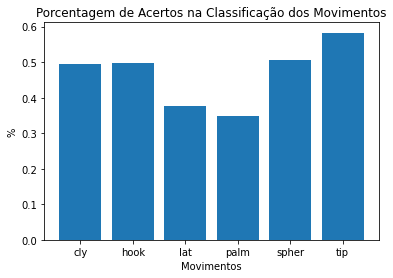

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.0803770096451838

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 73 kB 1.2 MB/s 
     |████████████████████████████████| 103 kB 25.6 MB/s 
     |████████████████████████████████| 11.2 MB 43.3 MB/s 
     |████████████████████████████████| 11.3 MB 43.0 MB/s 
     |████████████████████████████████| 15.7 MB 53.5 MB/s 
     |████████████████████████████████| 156 kB 60.0 MB/s 
     |████████████████████████████████| 191 kB 59.2 MB/s 
     |████████████████████████████████| 843 kB 39.6 MB/s 
     |████████████████████████████████| 41 kB 448 kB/s 
     |████████████████████████████████| 68 kB 5.1 MB/s 
     |████████████████████████████████| 890 kB 41.2 MB/s 
     |████████████████████████████████| 98 kB 5.8 MB/s 
     |████████████████████████████████| 6.5 MB 40.9 MB/s 
     |████████████████████████████████| 596 kB 75.2 MB/s 
     |████████████████████████████████| 461 kB 74.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

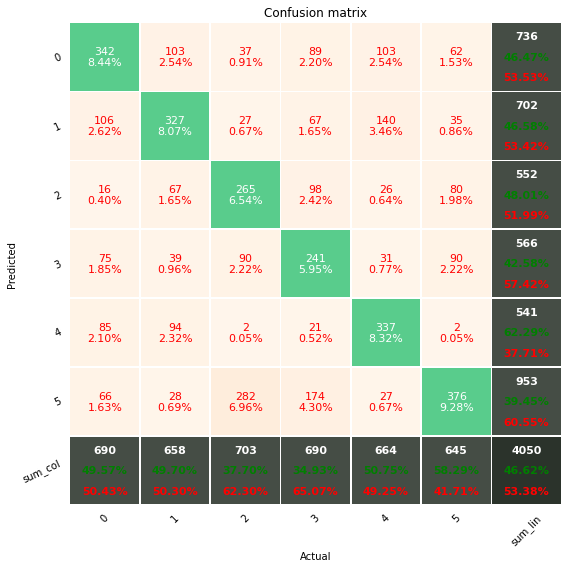

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)